In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
d0=pd.read_csv("iris.csv")

In [2]:
#seperate class label and computable data columns
print(d0.head())
l=d0['species']
d=d0.drop("species",axis=1)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
print(d.shape)
print(l.shape)

(150, 4)
(150,)


In [4]:
plt.figure(figsize=(7,7))


<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

2D visualization of PCA

In [5]:
data=d
print(data.shape)

(150, 4)


In [6]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(150, 4)


In [7]:
sample_data=standardized_data
covar_matrix=np.matmul(sample_data.T,sample_data)
print(covar_matrix.shape)

(4, 4)


In [8]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(2,3))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)


Shape of eigen vectors =  (4, 2)
Updated shape of eigen vectors =  (2, 4)


C:\Users\DELL\AppData\Local\Temp\ipykernel_24380\2944472019.py:2: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values,vectors=eigh(covar_matrix,eigvals=(2,3))


In [9]:
# 4d dta to 2 d data
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 4) X (4, 150)  =  (2, 150)


In [10]:
# add species label to the computaed data
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, l)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "species"))
print(dataframe.head())

  1st_principal 2nd_principal species
0     -0.505704     -2.264542  setosa
1      0.655405     -2.086426  setosa
2      0.318477      -2.36795  setosa
3      0.575368     -2.304197  setosa
4     -0.674767     -2.388777  setosa


plotig of data 

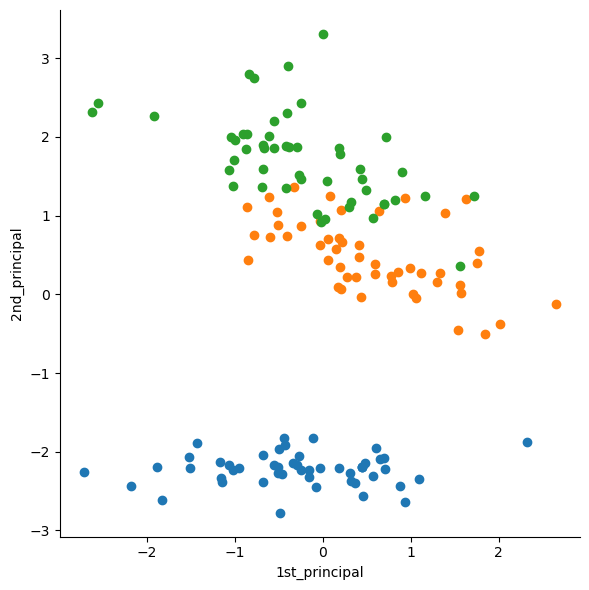

In [11]:
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt
sn.FacetGrid(dataframe,hue="species",height=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend
plt.show()

PCA Using Scikit Learn

In [12]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [13]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (150, 2)


In [14]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, l)).T
pca_data.shape



(150, 3)

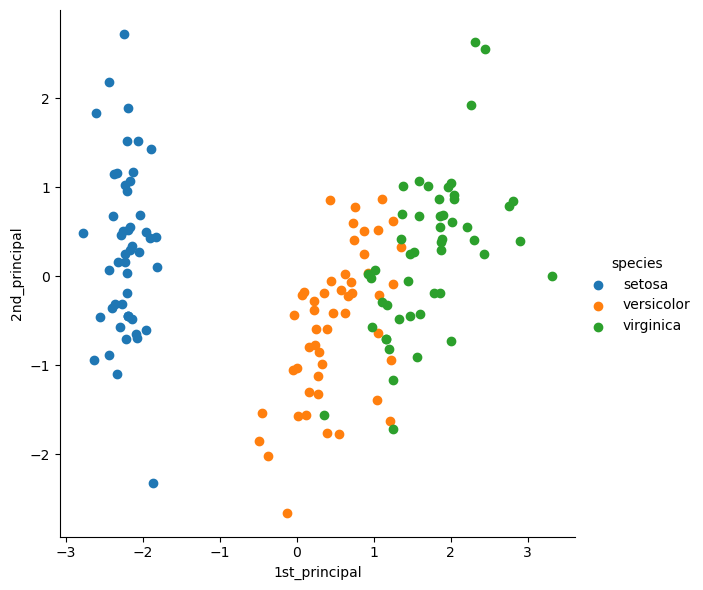

In [15]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "species"))
sn.FacetGrid(pca_df, hue="species", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()